# Exploratory Data Analysis(EDA) on Lok Sabha Election - 2014

### Importing import Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore' )

In [2]:
# Read the dataset
df = pd.read_csv('Data_LS.csv')

In [3]:
# Displaying first 5 enteries
df.head()

,Name of State/ UT,Parliamentary Constituency,Candidate Name,Total Votes Polled,Winner or Not?,Party Abbreviation,Party Name
0,Andhra Pradesh,Adilabad,GODAM NAGESH,430847,yes,TRS,Telangana Rashtra Samithi
1,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,41032,no,IND,Independent
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,184198,no,TDP,Telugu Desam
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,94420,no,BSP,Bahujan Samaj Party
4,Andhra Pradesh,Adilabad,MOSALI CHINNAIAH,8859,no,IND,Independent


In [4]:
# Displaying last 5 enteries
df.tail()

,Name of State/ UT,Parliamentary Constituency,Candidate Name,Total Votes Polled,Winner or Not?,Party Abbreviation,Party Name
8789,Puducherry,Puducherry,V. VIJAYA,746,no,IND,Independent
8790,Puducherry,Puducherry,R. VALAVAN,497,no,IND,Independent
8791,Puducherry,Puducherry,J. DHANDAPANI,1144,no,IND,Independent
8792,Puducherry,Puducherry,PUVALA NAGESWARA RAO,465,no,IND,Independent
8793,Puducherry,Puducherry,G. SUTHA,467,no,IND,Independent


### Exploratory Data Analysis:

In [5]:
# To find number of rows and columns

print("There are {} rows and {} columns in the dataframe.".format(df.shape[0],df.shape[1]))

There are 8794 rows and 7 columns in the dataframe.


In [6]:
# To know datatypes and missing values if any

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8794 entries, 0 to 8793
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of State/ UT           8794 non-null   object
 1   Parliamentary Constituency  8794 non-null   object
 2   Candidate Name              8794 non-null   object
 3   Total Votes Polled          8794 non-null   int64 
 4   Winner or Not?              8794 non-null   object
 5   Party Abbreviation          8794 non-null   object
 6   Party Name                  8794 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.0+ KB


- There are 6 object column and 1 integer column
- There are no mussing values

In [7]:
# Total number of votes polled

total_votes = df.groupby(['Name of State/ UT']).agg({'Total Votes Polled':sum}).sum()
print("Total number of votes polled during 2014 Lak sabha election was : {}".format(total_votes[0]))

Total number of votes polled during 2014 Lak sabha election was : 553801801


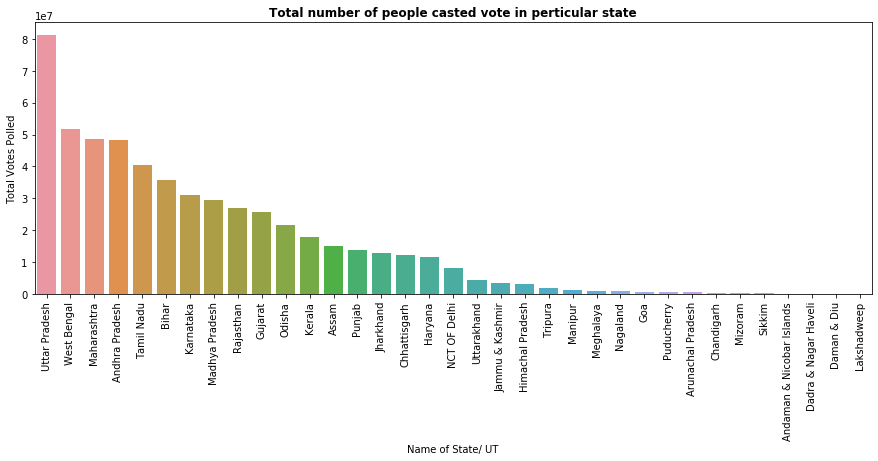

In [8]:
# Statewise total number of voters

total_votes_statewise = df.groupby(['Name of State/ UT']).agg({'Total Votes Polled':sum}).sort_values(
    'Total Votes Polled', ascending=False).reset_index()

plt.figure(figsize=(15,5))
plt.title('Total number of people casted vote in perticular state',fontweight="bold")
sns.barplot('Name of State/ UT','Total Votes Polled', data=total_votes_statewise)
plt.xticks(rotation=90)
plt.show()

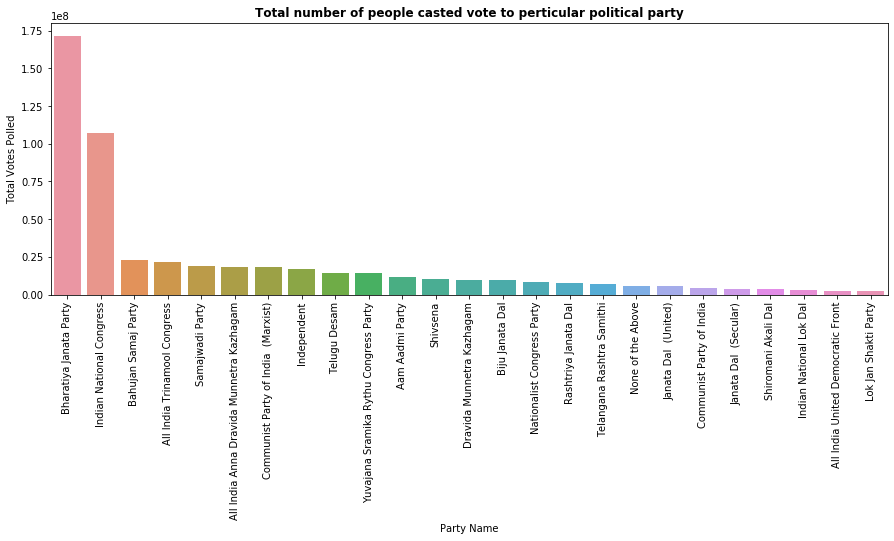

In [9]:
# Total votes partywise

partywise_total_vate = df.groupby(['Party Name']).agg({'Total Votes Polled':sum}).sort_values(
    'Total Votes Polled',ascending=False).reset_index().head(25)

plt.figure(figsize=(15,5))
plt.title('Total number of people casted vote to perticular political party',fontweight="bold")
sns.barplot('Party Name','Total Votes Polled',data=partywise_total_vate)
plt.xticks(rotation=90)
plt.show()

In [10]:
# Statewise top party that recieved total number of votes

swtpv =df.groupby(['Name of State/ UT','Party Name']).agg({'Total Votes Polled':sum}).sort_values([
    'Name of State/ UT','Total Votes Polled'],ascending=False).reset_index().drop_duplicates(
    'Name of State/ UT').reset_index().drop('index',axis=1)
swtpv

,Name of State/ UT,Party Name,Total Votes Polled
0,West Bengal,All India Trinamool Congress,20313280
1,Uttarakhand,Bharatiya Janata Party,2429698
2,Uttar Pradesh,Bharatiya Janata Party,34318576
3,Tripura,Communist Party of India (Marxist),1295436
4,Tamil Nadu,All India Anna Dravida Munnetra Kazhagam,17983168
5,Sikkim,Sikkim Democratic Front,163698
6,Rajasthan,Bharatiya Janata Party,14894748
7,Punjab,Indian National Congress,4575879
8,Puducherry,All India N.R. Congress,255826
9,Odisha,Biju Janata Dal,9491497


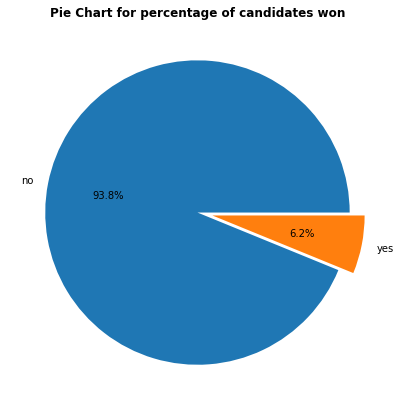

In [11]:
# pie chart of percentage of candidates won out of total candidate participated

plt.figure(figsize=(10,7))
plt.title('Pie Chart for percentage of candidates won',fontweight="bold")
plt.pie(df['Winner or Not?'].value_counts(),autopct='%1.1f%%', explode=(0,0.1),labels=df['Winner or Not?'
                                                                                        ].value_counts().index.tolist())
plt.show()

In [12]:
# statewise top 5 party with highest total number of votes 

top_5 = df.groupby(['Name of State/ UT','Party Name']).agg({'Total Votes Polled':sum}).sort_values([
    'Name of State/ UT','Total Votes Polled'],ascending=False).groupby(['Name of State/ UT']).head(5)
top_5

Total Votes Polled
Name of State/ UT         Party Name                                             
West Bengal               All India Trinamool Congress                   20313280
                          Communist Party of India  (Marxist)            11720997
                          Bharatiya Janata Party                          8691765
                          Indian National Congress                        4946581
                          Revolutionary Socialist Party                   1255794
...                                                                           ...
Andaman & Nicobar Islands Bharatiya Janata Party                            90969
                          Indian National Congress                          83157
                          Aam Aadmi Party                                    3737
                          Independent                                        3511
                          All India Trinamool Congress                       2283

[173 rows x 1 columns]

In [13]:
# statewise number of seats a party won

df[df['Winner or Not?']=='yes'].groupby(['Name of State/ UT','Party Name']).agg({'Winner or Not?':'count'})

Winner or Not?
Name of State/ UT         Party Name                                            
Andaman & Nicobar Islands Bharatiya Janata Party                               1
Andhra Pradesh            All India Majlis-E-Ittehadul Muslimeen               1
                          Bharatiya Janata Party                               3
                          Indian National Congress                             2
                          Telangana Rashtra Samithi                           11
...                                                                          ...
Uttarakhand               Bharatiya Janata Party                               5
West Bengal               All India Trinamool Congress                        34
                          Bharatiya Janata Party                               2
                          Communist Party of India  (Marxist)                  2
                          Indian National Congress                             4

[81 rows x 1 columns]

In [14]:
# Top 15 party with most number of seats won

Top_15 = df[df['Winner or Not?']=='yes'].groupby('Party Name').agg({"Winner or Not?": 'count'}).sort_values(
    "Winner or Not?",ascending=False).rename(columns={"Winner or Not?": 'Seats_won'}).head(15)

Top_15

,Seats_won
Party Name,
Bharatiya Janata Party,282
Indian National Congress,44
All India Anna Dravida Munnetra Kazhagam,37
All India Trinamool Congress,34
Biju Janata Dal,20
Shivsena,18
Telugu Desam,16
Telangana Rashtra Samithi,11
Yuvajana Sramika Rythu Congress Party,9


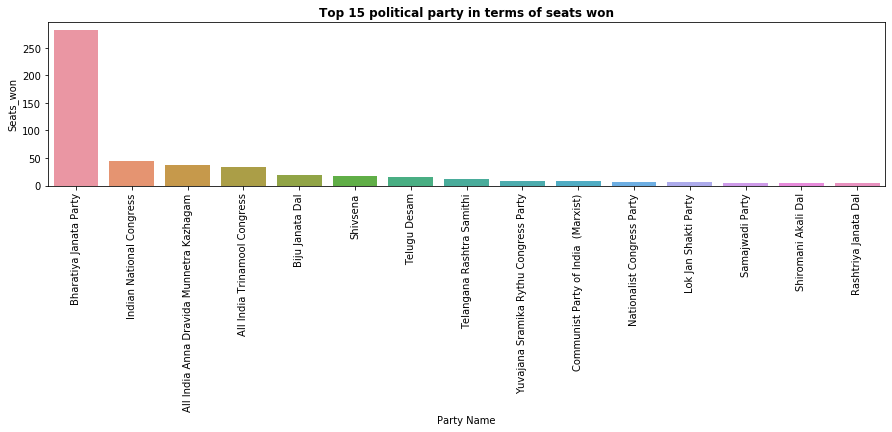

In [15]:
a=Top_15.reset_index()
plt.figure(figsize=(15,3))
plt.title('Top 15 political party in terms of seats won',fontweight="bold")
sns.barplot(x=a['Party Name'],y=a['Seats_won'])
plt.xticks(rotation=90)
plt.show()

#### Pie chart for total number of seats per political party:

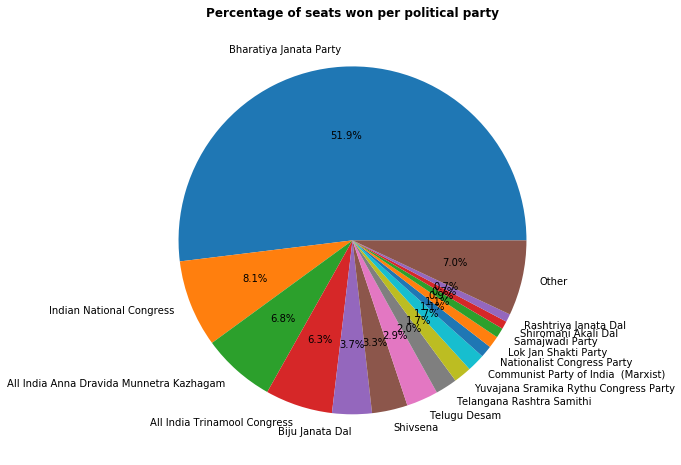

In [16]:
# Grouping
a=df[df['Winner or Not?']=='yes'].groupby('Party Name').agg({"Winner or Not?": 'count'}).sort_values(
    "Winner or Not?",ascending=False).rename(columns={"Winner or Not?": 'Seats_won'})

# Taking top 15 party by number of seats and remaining put in to other
other_value = a.sum()[0]-a.head(15).sum()[0]

a=a.head(15).reset_index()

# DataFrame for other
b=pd.DataFrame({'Party Name':['Other'],
             'Seats_won':[other_value]})

# Joing the other with the top 15
a=a.append(b,ignore_index=True)

data=a.Seats_won.tolist()
label=a['Party Name'].tolist()
plt.figure(figsize=(20,8))
plt.title('Percentage of seats won per political party',fontweight="bold")
plt.pie(data,labels=label, autopct='%1.1f%%')
plt.show()

#### Calculating Vote margin by which a candidate has won:

In [17]:
# Taking out all the candiates that has df_won
df_won = df[df['Winner or Not?']=='yes'].reset_index().drop('index',axis=1)

# Taking column name is list
constituency_name = pd.unique(df_won['Parliamentary Constituency'])

# Creating new column as assigning with 'NaN'
df_won['Vote_margin'] = np.nan

In [18]:
# For loop to calculate vote margin and filling it to its respective place
for i in constituency_name:
    row = df[df['Parliamentary Constituency']== i ].sort_values('Total Votes Polled', ascending=False)
    first = row.iloc[0][3]
    second = row.iloc[1][3]
    difference = first - second
    df_won[df_won['Parliamentary Constituency']== i] = df_won[df_won['Parliamentary Constituency']== i].fillna(difference)
    
# Since the column 'Vote_margin' is in float, changing it to int
df_won['Vote_margin']=df_won['Vote_margin'].astype(int)

In [19]:
# Bottom 10 candidates in turms of vote vargin
buttom_10_margin = df_won.sort_values('Vote_margin',ascending=False).tail(10)

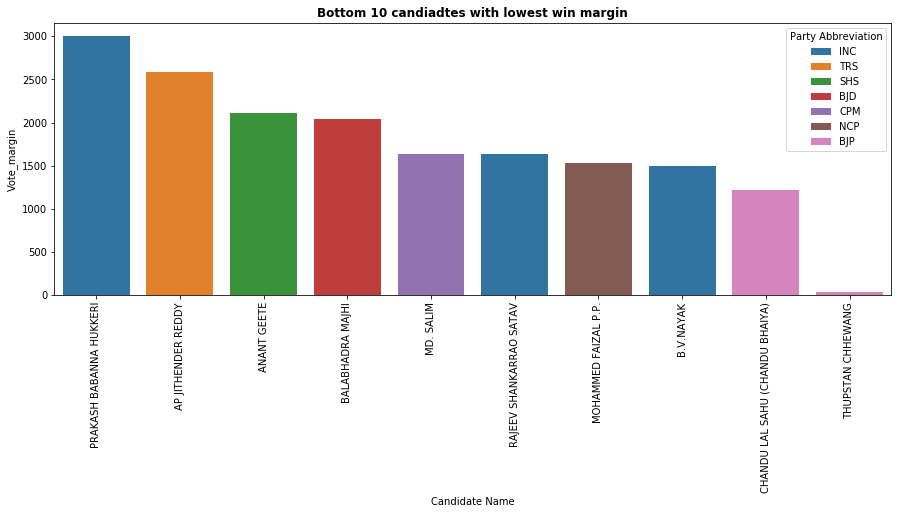

In [20]:
# Plotting for Bottom 10 candidates in turms of vote vargin
plt.figure(figsize=(15,5))
plt.title('Bottom 10 candiadtes with lowest win margin',fontweight="bold")
sns.barplot('Candidate Name','Vote_margin',hue='Party Abbreviation',data=buttom_10_margin, dodge=False)
plt.xticks(rotation=90)
plt.show()

In [21]:
# Top 10 candidates in turms of vote vargin
top_10_margin = df_won.sort_values('Vote_margin',ascending=False).head(10)

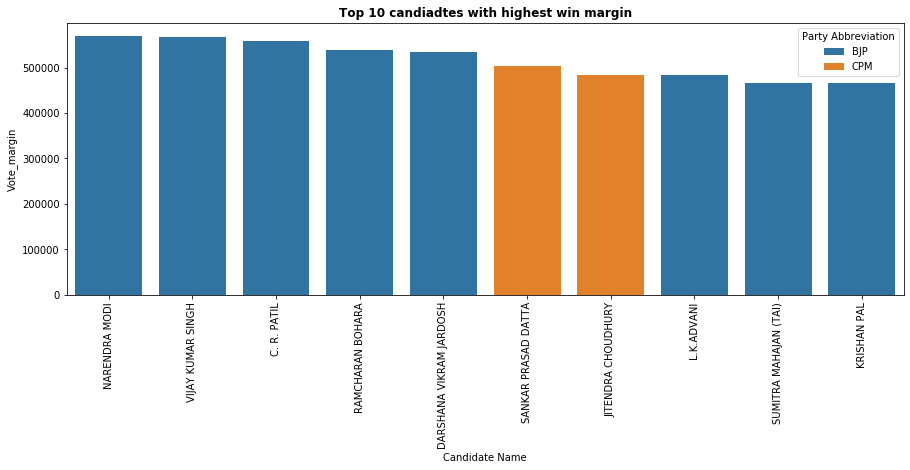

In [22]:
# Plotting for Top 10 candidates in turms of vote vargin
plt.figure(figsize=(15,5))
plt.title('Top 10 candiadtes with highest win margin',fontweight="bold")
sns.barplot('Candidate Name','Vote_margin',hue='Party Abbreviation',data=top_10_margin, dodge=False)
plt.xticks(rotation=90)
plt.show()

In [23]:
# Maximum vote margin
df_won[df_won['Vote_margin']==max(df_won['Vote_margin'])]

,Name of State/ UT,Parliamentary Constituency,Candidate Name,Total Votes Polled,Winner or Not?,Party Abbreviation,Party Name,Vote_margin
119,Gujarat,Vadodara,NARENDRA MODI,845464,yes,BJP,Bharatiya Janata Party,570128


In [24]:
# Minimum vote margin
df_won[df_won['Vote_margin']==min(df_won['Vote_margin'])]

,Name of State/ UT,Parliamentary Constituency,Candidate Name,Total Votes Polled,Winner or Not?,Party Abbreviation,Party Name,Vote_margin
143,Jammu & Kashmir,Ladakh,THUPSTAN CHHEWANG,31111,yes,BJP,Bharatiya Janata Party,36


### Do let me know if anything better or extra could be done 
## Happy Learning!